In [33]:
# Basic data handling and computational packages
import numpy as np
import pandas as pd
import re

# Machine Learning models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

# Preprocessing and model evaluation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (GridSearchCV, train_test_split,
                                     learning_curve)
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, make_scorer,
                             classification_report)

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Neural Networks and callbacks with Keras (part of TensorFlow)
import tensorflow as tf
from keras.callbacks import Callback, EarlyStopping
from keras import Input, Model
from keras.layers import Dense
from keras.metrics import Precision, Accuracy, Precision, Recall, F1Score

# Miscellaneous
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific types of warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# IPython command to ensure that plots are displayed inline
%matplotlib inline


In [14]:
MY_PC = '.'
MY_DRIVE = '/content/drive/MyDrive/KFUPM/ICS485 Machine Learning/machine-learning'


working_on = MY_PC

# Reading the data

In [15]:
train_data = pd.read_csv(working_on + "/preprocessed_data/train_data.csv")
val_data = pd.read_csv(working_on + "/preprocessed_data/val_data.csv")
test_data = pd.read_csv(working_on + "/preprocessed_data/test_data.csv")

In [16]:
train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X13_ FC11,X13_ FC13,X13_ FC14,X14_ CA23,X14_ CA50,X14_ CA59,Y
0,-1.520449,-1.428585,1.530877,-1.162058,-0.836349,-0.535183,-1.042610,-2.433676,-0.612921,-0.707368,0.0,0.0,1.0,0.0,0.0,0.0,Mercedes
1,0.019717,-0.578489,1.649464,-0.522458,-0.204228,-0.694313,1.210780,-1.719345,-2.155114,-0.453929,0.0,1.0,0.0,0.0,0.0,0.0,BMW
2,-1.149807,0.019739,0.226418,-0.658669,-0.263490,-0.870256,1.034734,0.185537,-0.753121,-0.819252,0.0,0.0,1.0,0.0,0.0,0.0,Honda
3,-1.708274,-0.415010,1.530877,-0.984392,-0.540042,-1.025183,1.316407,-1.147880,-1.944815,-0.890957,0.0,0.0,1.0,0.0,0.0,0.0,Honda
4,-1.034608,-0.534895,1.175115,0.667908,1.711888,-0.910489,1.210780,-1.100258,-1.734516,-0.234488,0.0,0.0,1.0,1.0,0.0,0.0,Mercedes


,Column,Non-Null Count,Dtype,Unique Values
Y,Y,6714,object,6
X1,X1,6714,float64,1393
X2,X2,6714,float64,2763
X3,X3,6714,float64,48
X4,X4,6714,float64,657
X5,X5,6714,float64,306
X6,X6,6714,float64,3077
X7,X7,6714,float64,167
X8,X8,6714,float64,131
X9,X9,6714,float64,243


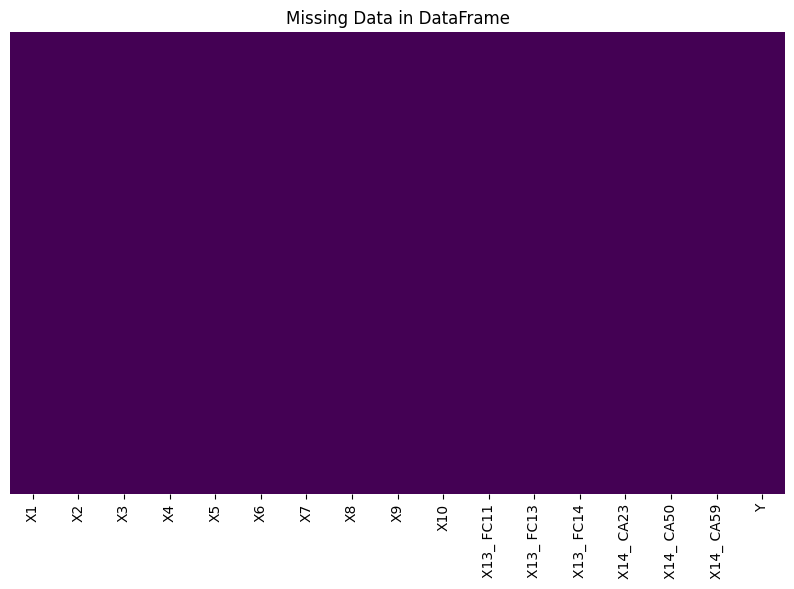

In [17]:
def display_dataframe_summary(dataframe, sort_by='Column'):

    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.notnull().sum(),
        'Dtype': dataframe.dtypes,
        'Unique Values': dataframe.nunique()
    })

    # Extracting numerical part from column names for sorting
    summary['Sort Key'] = summary['Column'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Sorting the summary DataFrame
    if sort_by == 'Column':
        summary = summary.sort_values(by='Sort Key', ascending=True)
    else:
        summary = summary.sort_values(by=sort_by, ascending=True)

    summary = summary.drop('Sort Key', axis=1)  # Remove the auxiliary sort key column

    # Display the summary
    display(summary)

    # Plotting missing data
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Data in DataFrame')
    plt.show()

# Call the function with your DataFrame
display_dataframe_summary(train_data, sort_by='Column')


In [18]:
X_train = train_data.drop('Y', axis=1).to_numpy()
y_train = train_data['Y'].to_numpy()

X_val = val_data.drop('Y', axis=1).to_numpy()
y_val = val_data['Y'].to_numpy()

X_test = test_data.drop('Y', axis=1).to_numpy()
y_test = test_data['Y'].to_numpy()


In [19]:
classes = train_data["Y"].unique()
num_classes = len(classes)
input_features = X_train.shape[1]
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns

print(f"The classes is: {classes}")
print(f"Number of classes: {num_classes}")
print(f"Number of features: {input_features}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}" )

print(categorical_cols)

The classes is: ['Mercedes' 'BMW' 'Honda' 'Toyota' 'GMC' 'Ford']
Number of classes: 6
Number of features: 16
X_train shape: (6714, 16), y_train shape: (6714,)
Index(['Y'], dtype='object')


# Models

In [20]:
models = {}

## Plot models Function

In [21]:
# def plot_models(models, X_val, y_val):
#     fig, ax = plt.subplots(figsize=(10, 6))

#     for estimator in models:
#         val_sizes, val_scores, _ = learning_curve(
#             estimator, X_val, y_val, cv=5, scoring=make_scorer(f1_score, average='macro'))

#         val_scores_mean = val_scores.mean(axis=1)
#         val_scores_std = val_scores.std(axis=1)

#         ax.fill_between(val_sizes, val_scores_mean - val_scores_std,
#                         val_scores_mean + val_scores_std, alpha=0.1)
#         ax.plot(val_sizes, val_scores_mean, 'o-', label=f"{estimator.__class__.__name__}")

#     ax.set_xlabel("Training examples")
#     ax.set_ylabel("F1 Macro Score")
#     ax.set_title("Learning Curves for Multiple Models (Training Score Only)")
#     ax.legend()
#     plt.show()


# Evaluation Fuction

In [22]:
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    y_pred = model.predict(X_test)

    # Calculate the F1 score
    test_f1_score = f1_score(y_test, y_pred, average='macro')
    test_accuacy = accuracy_score(y_test, y_pred)


    print(f"Test F1 macro: {test_f1_score:.2f}")
    print(f"Test Accuracy: {test_accuacy:.2f}")

    report = classification_report(y_test, y_pred, target_names=classes)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = classes)
    
    print("Confusion Matrix:")
    cm_display.plot()
    plt.show()

    return test_f1_score, test_accuacy

## Logistic Regression

In [23]:
# Will be using cross validation, therefore merge the train and val 
X_train_cross_entropy = np.vstack([X_train, X_val])
y_train_cross_entropy = np.concatenate((y_train, y_val), axis = 0)

# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','lbfgs','newton-cg', 'saga']
}

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_cross_entropy, y_train_cross_entropy)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best params for Logistic Regression: {best_params}')

LogisticRegression_model = LogisticRegression(**best_params, random_state=777)
LogisticRegression_model.fit(X_train_cross_entropy, y_train_cross_entropy)


c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ammar\OneDriv

Best params for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


LogisticRegression(C=100, random_state=777, solver='newton-cg')

Test F1 macro: 0.79
Test Accuracy: 0.82
              precision    recall  f1-score   support

    Mercedes       0.87      0.88      0.87       221
         BMW       0.55      0.89      0.68        19
       Honda       0.63      0.85      0.72        46
      Toyota       0.76      0.77      0.77       211
         GMC       0.86      0.86      0.86       246
        Ford       0.90      0.74      0.81       174

    accuracy                           0.82       917
   macro avg       0.76      0.83      0.79       917
weighted avg       0.83      0.82      0.82       917

Confusion Matrix:


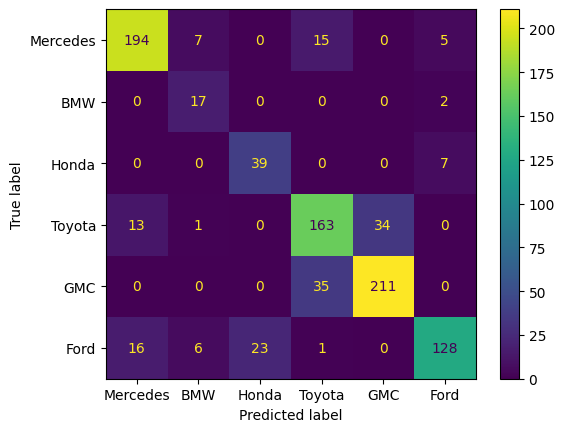

In [24]:
test_f1_score, test_accuacy = evaluate_model(LogisticRegression_model, X_test, y_test)
models["LR"] = test_f1_score, test_accuacy

## SVM

In [25]:

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3]
}

# Create an SVM model
svm_model = SVC(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_cross_entropy, y_train_cross_entropy)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best params for SVM: {best_params}')

SVM_model = SVC(**best_params, random_state=777)
SVM_model.fit(X_train_cross_entropy, y_train_cross_entropy)



Best params for SVM: {'C': 100, 'degree': 2, 'kernel': 'rbf'}


SVC(C=100, degree=2, random_state=777)

Test F1 macro: 0.89
Test Accuracy: 0.93
              precision    recall  f1-score   support

    Mercedes       0.91      0.98      0.94       221
         BMW       0.76      0.68      0.72        19
       Honda       0.90      0.93      0.91        46
      Toyota       0.92      0.92      0.92       211
         GMC       0.96      0.95      0.95       246
        Ford       0.96      0.87      0.91       174

    accuracy                           0.93       917
   macro avg       0.90      0.89      0.89       917
weighted avg       0.93      0.93      0.93       917

Confusion Matrix:


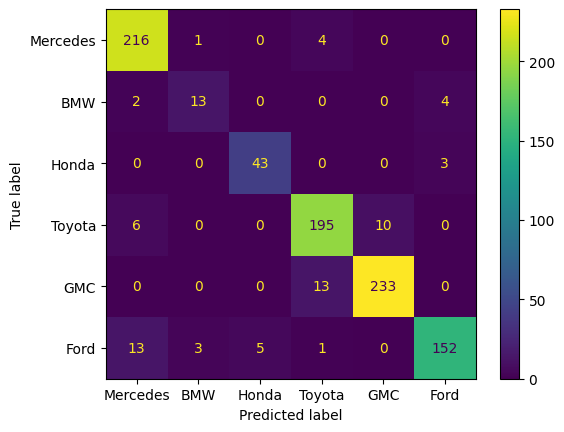

In [26]:
test_f1_score, test_accuacy = evaluate_model(SVM_model, X_test, y_test)
models["SVM"] = test_f1_score, test_accuacy

## Decision Tree

In [27]:


# Define the parameter grid for Decision Trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_cross_entropy, y_train_cross_entropy)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best params for Decision Tree: {best_params}')

DT_model = DecisionTreeClassifier(**best_params, random_state=777)
DT_model.fit(X_train_cross_entropy, y_train_cross_entropy)


Best params for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=777)

Test F1 macro: 0.86
Test Accuracy: 0.89
              precision    recall  f1-score   support

    Mercedes       0.91      0.95      0.93       221
         BMW       0.70      0.84      0.76        19
       Honda       0.78      0.87      0.82        46
      Toyota       0.87      0.87      0.87       211
         GMC       0.92      0.93      0.92       246
        Ford       0.92      0.83      0.87       174

    accuracy                           0.89       917
   macro avg       0.85      0.88      0.86       917
weighted avg       0.90      0.89      0.89       917

Confusion Matrix:


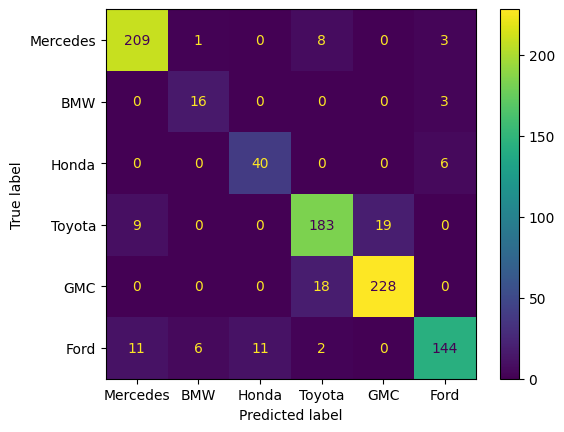

In [28]:
test_f1_score, test_accuacy = evaluate_model(DT_model, X_test, y_test)
models["DT"] = test_f1_score, test_accuacy

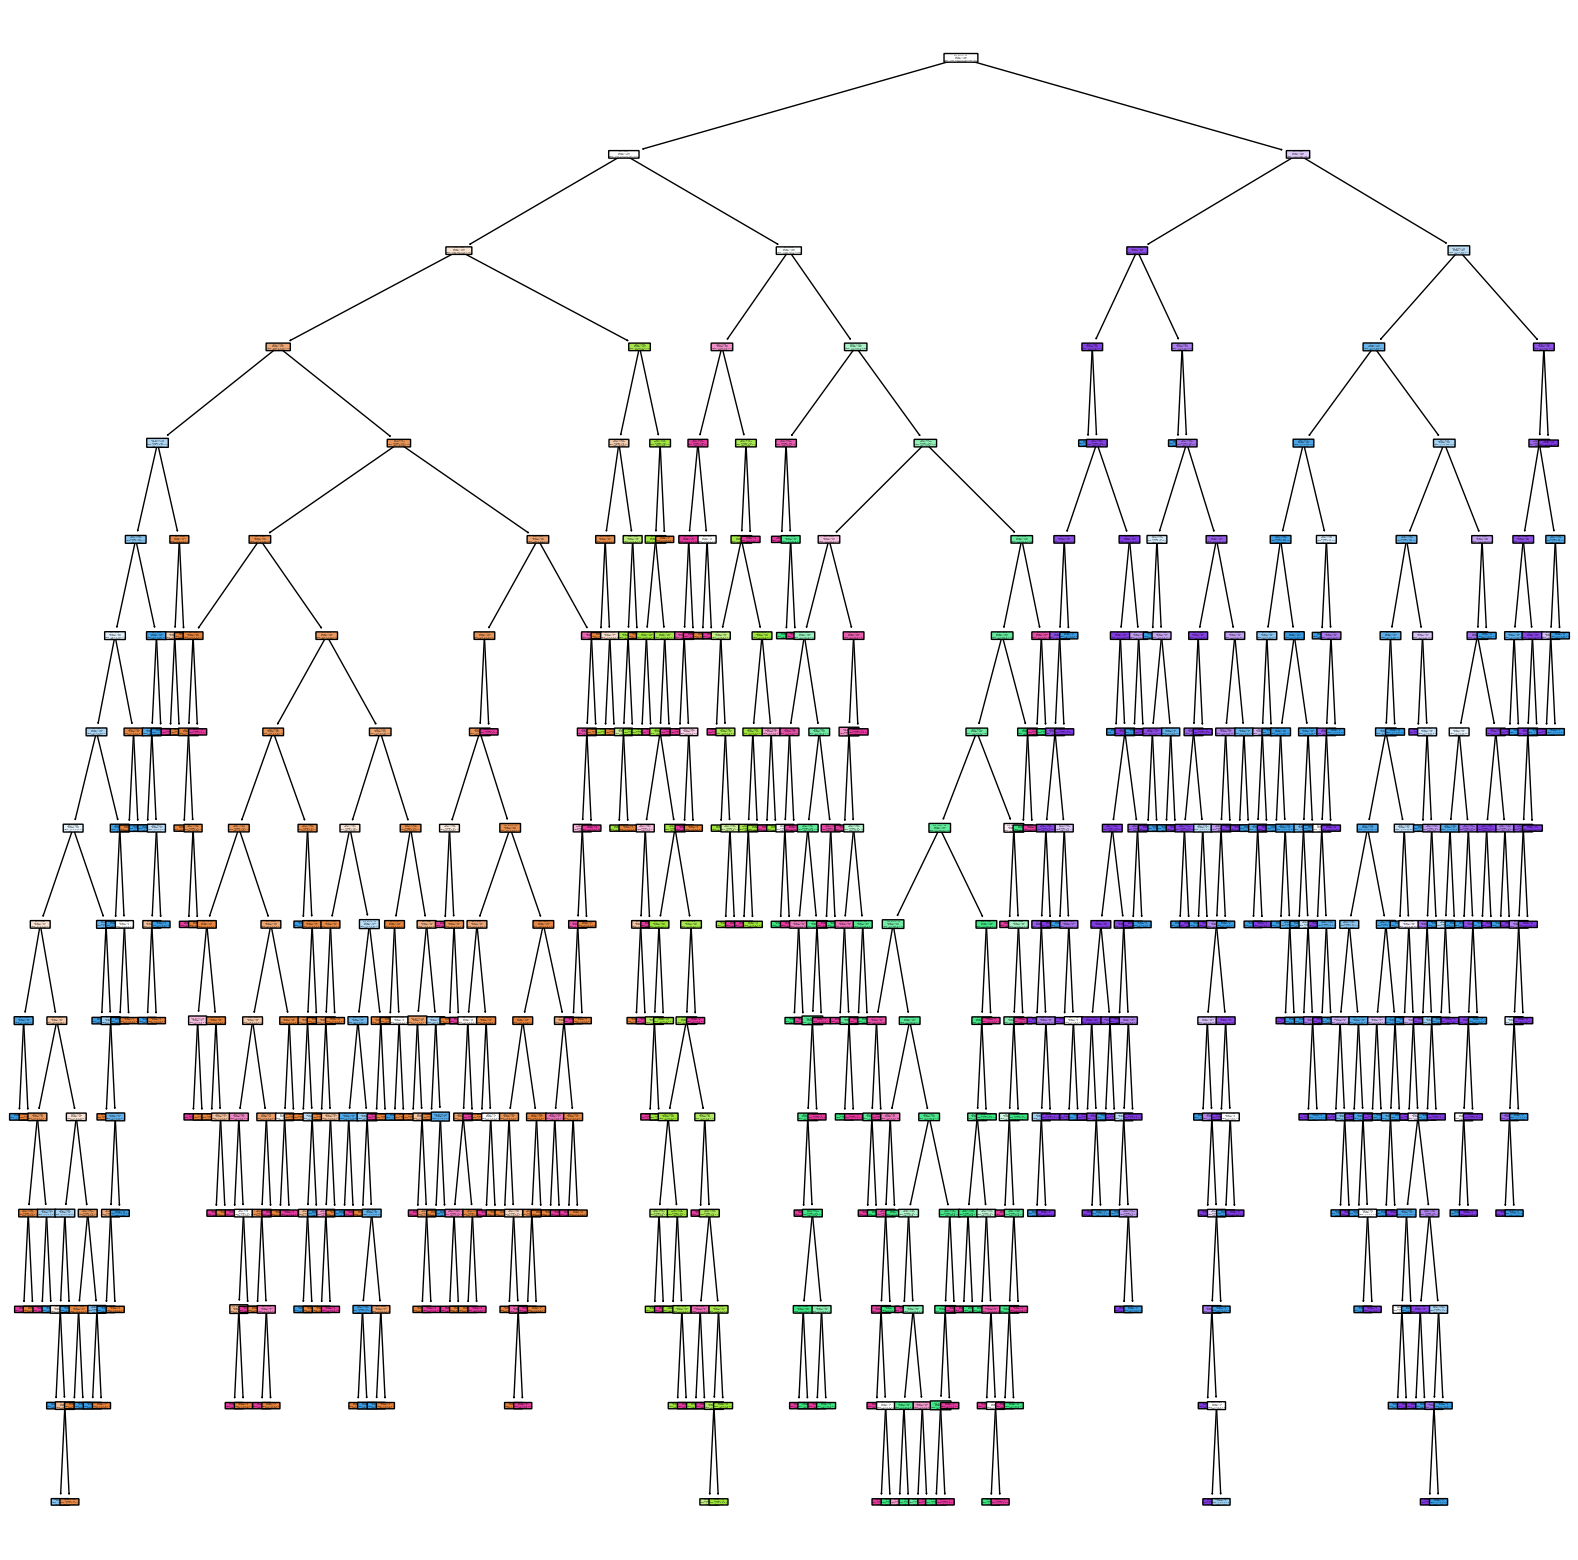

In [29]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 20))
plot_tree(DT_model, filled=True, feature_names=train_data.drop('Y', axis=1).columns, class_names=classes, rounded=True)
plt.show()

## Random Forest

In [30]:

# Define the parameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 200, 400, 1000],  
    'max_depth': [None, 10, 30],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2] 
}

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=777)

# Use F1-macro as the scoring metric
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Create a GridSearchCV object with F1-macro scoring
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=f1_macro_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_cross_entropy, y_train_cross_entropy)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f'Best params for Random Forest: {best_params}')

RF_model = RandomForestClassifier(**best_params, random_state=777)
RF_model.fit(X_train_cross_entropy, y_train_cross_entropy)


Best params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


RandomForestClassifier(n_estimators=1000, random_state=777)

Test F1 macro: 0.91
Test Accuracy: 0.93
              precision    recall  f1-score   support

    Mercedes       0.93      0.98      0.95       221
         BMW       0.73      0.84      0.78        19
       Honda       0.91      0.93      0.92        46
      Toyota       0.92      0.91      0.91       211
         GMC       0.95      0.96      0.95       246
        Ford       0.96      0.88      0.92       174

    accuracy                           0.93       917
   macro avg       0.90      0.92      0.91       917
weighted avg       0.93      0.93      0.93       917

Confusion Matrix:


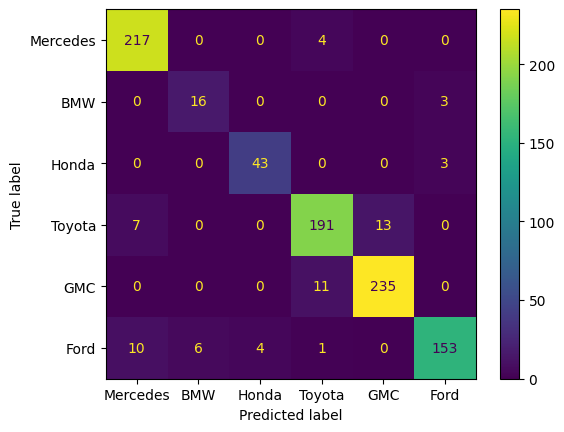

In [31]:
test_f1_score, test_accuacy = evaluate_model(RF_model, X_test, y_test)
models["RF"] = test_f1_score, test_accuacy

## Neural Network

In [34]:
def build_model(input_features, num_classes):
    # Create model
    input_data = Input(shape=(input_features,))
    x = Dense(64, activation='relu')(input_data)
    x = Dense(128, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=input_data, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
            'accuracy',  # Default accuracy metric
            F1Score(average="macro")  # F1 Score
        ])

    return model



model = build_model(input_features, num_classes)

# Model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 6)                 102       
                                                                 
Total params: 14166 (55.34 KB)
Trainable params: 14166 (55

In [35]:
y_train_NN = OneHotEncoder(sparse_output=False).fit_transform(y_train.reshape(-1, 1))
y_val_NN = OneHotEncoder(sparse_output=False).fit_transform(y_val.reshape(-1, 1))
y_test_NN = OneHotEncoder(sparse_output=False).fit_transform(y_test.reshape(-1, 1))


In [36]:
class PrintMetricsEveryNEpochs(Callback):
    def __init__(self, n_epochs=5):
        super().__init__()
        self.n_epochs = n_epochs

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n_epochs == 0:
            metrics_output = f"Epoch {epoch + 1}:\n" + "\n".join([f"{metric}: {value:.4f}" for metric, value in logs.items()])
            print(metrics_output)
            print("-" * 40)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Adjusted patience
    verbose=True,
    mode='min',
    restore_best_weights=True
)

# Assuming model, X_train, y_train_NN, X_val, y_val_NN are defined
print_metrics = PrintMetricsEveryNEpochs(n_epochs=5)

history = model.fit(
    X_train, y_train_NN,
    validation_data=(X_val, y_val_NN),
    epochs=1000,
    batch_size=32,
    callbacks=[early_stopping, print_metrics],
    verbose=False
)




Epoch 5:
loss: 0.2391
accuracy: 0.9090
f1_score: 0.9082
val_loss: 0.3285
val_accuracy: 0.8788
val_f1_score: 0.8324
----------------------------------------
Epoch 10:
loss: 0.1822
accuracy: 0.9340
f1_score: 0.9336
val_loss: 0.3037
val_accuracy: 0.8897
val_f1_score: 0.8474
----------------------------------------
Epoch 15:
loss: 0.1549
accuracy: 0.9404
f1_score: 0.9402
val_loss: 0.2909
val_accuracy: 0.8821
val_f1_score: 0.8332
----------------------------------------
Epoch 20:
loss: 0.1270
accuracy: 0.9528
f1_score: 0.9526
val_loss: 0.2750
val_accuracy: 0.8843
val_f1_score: 0.8597
----------------------------------------
Epoch 25:
loss: 0.1130
accuracy: 0.9581
f1_score: 0.9580
val_loss: 0.2600
val_accuracy: 0.9072
val_f1_score: 0.8965
----------------------------------------
Epoch 30:
loss: 0.0932
accuracy: 0.9656
f1_score: 0.9655
val_loss: 0.2499
val_accuracy: 0.9170
val_f1_score: 0.9060
----------------------------------------
Epoch 35:
loss: 0.0862
accuracy: 0.9678
f1_score: 0.9678


In [37]:
# Final evaluation of the model
loss, acc, f1 = model.evaluate(X_test, y_test_NN)
models["NN"] = f1, acc  # Storing F1 score in the models dictionary
print("Test Loss: {:.2f}".format(loss))
print("Test Accuracy: {:.2f}%".format(acc * 100))
print("Test F1 Score: {:.2f}%".format(f1 * 100))

29/29 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.9117 - f1_score: 0.8833
Test Loss: 0.33
Test Accuracy: 91.17%
Test F1 Score: 88.33%


In [38]:
# Get predictions for the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_NN, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=classes)
print(report)


29/29 [==============================] - 0s 929us/step
              precision    recall  f1-score   support

    Mercedes       0.92      0.94      0.93       221
         BMW       0.68      0.79      0.73        19
       Honda       0.89      0.91      0.90        46
      Toyota       0.85      0.92      0.88       211
         GMC       0.96      0.91      0.93       246
        Ford       0.96      0.89      0.92       174

    accuracy                           0.91       917
   macro avg       0.88      0.89      0.88       917
weighted avg       0.91      0.91      0.91       917



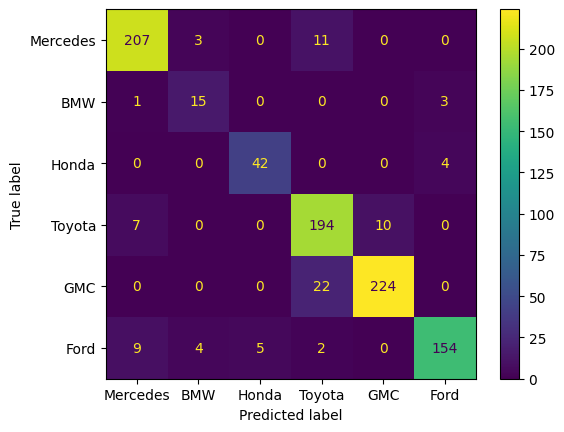

In [39]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

## Adaboost

In [40]:
best_va = -1 # validation accuracy
best_model = None
best_n_estimators = None
best_estimator = None
best_algorithm = None

n_estimators = [50, 100, 200]
estimators = [DecisionTreeClassifier(criterion="log_loss", max_depth=3, random_state=777), DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=777), DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=777)]
algorithms = ["SAMME", "SAMME.R"]
for n_estimator in n_estimators:
    for estimator in estimators:
        for algorithm in algorithms:
            print(f"Current setting: n_estimators={n_estimator}, estimator={estimator.__class__.__name__}, algorithm={algorithm}")
            model = AdaBoostClassifier(estimator=estimator, n_estimators=n_estimator, algorithm=algorithm, random_state=777)
            model.fit(X_train, y_train)
            ta = f1_score(y_train, model.predict(X_train), average='weighted')
            va = f1_score(y_val, model.predict(X_val), average='weighted')
            
            print(f"Train F1 score: {ta:.2f}")
            print(f"Validation F1 score: {va:.2f}")
            if best_va < va:
                best_va = va
                best_model = model
                best_n_estimators = n_estimator
                best_estimator = estimator
                best_algorithm = algorithm
                
            print("-" * 100)
            



Current setting: n_estimators=50, estimator=DecisionTreeClassifier, algorithm=SAMME
Train F1 score: 0.87
Validation F1 score: 0.82
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=50, estimator=DecisionTreeClassifier, algorithm=SAMME.R
Train F1 score: 0.78
Validation F1 score: 0.76
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=50, estimator=DecisionTreeClassifier, algorithm=SAMME
Train F1 score: 0.86
Validation F1 score: 0.83
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=50, estimator=DecisionTreeClassifier, algorithm=SAMME.R
Train F1 score: 0.69
Validation F1 score: 0.67
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=50, estimator=DecisionTreeClassifier, 

In [41]:
# Print out the best model after the loop
print(f"Best model: n_estimators={best_n_estimators}, estimator={best_estimator.__class__.__name__} with a criterion={best_estimator.criterion}, algorithm={best_algorithm}, Validation Accuracy: {best_va:.2f}")

Best model: n_estimators=100, estimator=DecisionTreeClassifier with a criterion=gini, algorithm=SAMME, Validation Accuracy: 0.84


Test F1 macro: 0.82
Test Accuracy: 0.84
              precision    recall  f1-score   support

    Mercedes       0.91      0.85      0.88       221
         BMW       0.68      0.89      0.77        19
       Honda       0.83      0.65      0.73        46
      Toyota       0.75      0.87      0.81       211
         GMC       0.92      0.82      0.87       246
        Ford       0.82      0.87      0.84       174

    accuracy                           0.84       917
   macro avg       0.82      0.83      0.82       917
weighted avg       0.85      0.84      0.84       917

Confusion Matrix:


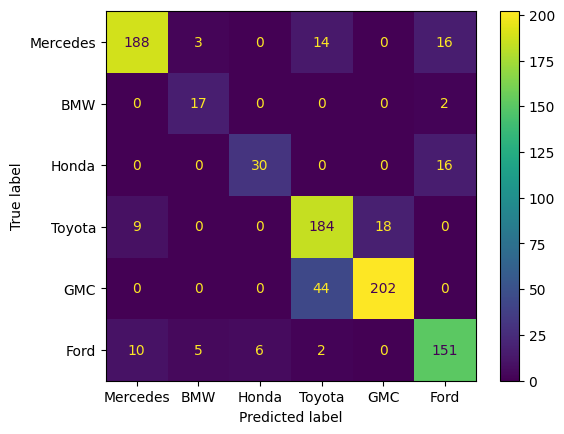

In [42]:
test_f1_score, test_accuacy  = evaluate_model(best_model, X_test, y_test)
models["Adaboost"] = test_f1_score, test_accuacy

## XGBoost

In [43]:
y_train_xgb = OneHotEncoder(sparse_output=False).fit_transform(y_train.reshape(-1, 1))
y_val_xgb = OneHotEncoder(sparse_output=False).fit_transform(y_val.reshape(-1, 1))
y_test_xgb = OneHotEncoder(sparse_output=False).fit_transform(y_test.reshape(-1, 1))


In [44]:


best_va = -1  # validation accuracy
best_model = None
best_n_estimators = None
best_max_depth = None
best_learning_rate = None

n_estimators = [200, 500, 1000]
max_depths = [5, 6, 7]
learning_rates = [0.1, 0.2]

for n_estimator in n_estimators:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            print(f"Current setting: n_estimators={n_estimator}, max_depth={max_depth}, learning_rate={learning_rate}")
            
            model = xgb.XGBClassifier(n_estimators=n_estimator, max_depth=max_depth, learning_rate=learning_rate, random_state=777)
            model.fit(X_train, y_train_xgb)
            
            ta = f1_score(y_train_xgb, model.predict(X_train), average='weighted')
            va = f1_score(y_val_xgb, model.predict(X_val), average='weighted')
            
            print(f"Train F1 score: {ta:.2f}")
            print(f"Validation F1 score: {va:.2f}")
            if best_va < va:
                best_va = va
                best_model = model
                best_n_estimators = n_estimator
                best_max_depth = max_depth
                best_learning_rate = learning_rate
            print("-" * 100)

# The best model and its parameters can then be used for predictions or further analysis.


Current setting: n_estimators=200, max_depth=5, learning_rate=0.1
Train F1 score: 1.00
Validation F1 score: 0.93
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=200, max_depth=5, learning_rate=0.2
Train F1 score: 1.00
Validation F1 score: 0.94
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=200, max_depth=6, learning_rate=0.1
Train F1 score: 1.00
Validation F1 score: 0.93
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=200, max_depth=6, learning_rate=0.2
Train F1 score: 1.00
Validation F1 score: 0.94
----------------------------------------------------------------------------------------------------
Current setting: n_estimators=200, max_depth=7, learning_rate=0.1
Train F1 score: 1.00
Validation F1 score: 0.94
-------------------------------

In [45]:
print(f"Best model: n_estimators={best_n_estimators}, max_depth={best_max_depth}, learning_rate={best_learning_rate}, Validation F1 Score: {best_va:.2f}")


Best model: n_estimators=1000, max_depth=7, learning_rate=0.1, Validation F1 Score: 0.94


Test F1 Score: 0.93
Test Accuracy: 0.92
              precision    recall  f1-score   support

    Mercedes       0.92      0.98      0.95       221
         BMW       0.67      0.84      0.74        19
       Honda       0.86      0.93      0.90        46
      Toyota       0.92      0.92      0.92       211
         GMC       0.96      0.95      0.95       246
        Ford       0.96      0.87      0.91       174

   micro avg       0.93      0.93      0.93       917
   macro avg       0.88      0.91      0.90       917
weighted avg       0.93      0.93      0.93       917
 samples avg       0.92      0.93      0.93       917



c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


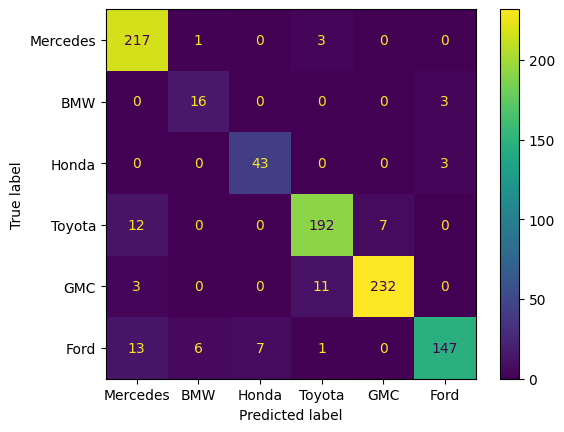

In [46]:
y_pred = best_model.predict(X_test)

# Calculate the F1 score
test_f1_score = f1_score(y_test_xgb, y_pred, average='weighted')
test_acc = accuracy_score(y_test_xgb, y_pred)


print(f"Test F1 Score: {test_f1_score:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

report = classification_report(y_test_xgb, y_pred, target_names=classes)
print(report)

cm = confusion_matrix(np.argmax(y_test_xgb, axis=1), np.argmax(y_pred, axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

cm_display.plot()
plt.show()

models["xgb"] = test_f1_score,test_acc


In [47]:
print(models)

{'LR': (0.7854586617226268, 0.8200654307524536), 'SVM': (0.8943394581888313, 0.9291166848418757), 'DT': (0.8634185099703441, 0.8942202835332607), 'RF': (0.9072127770955879, 0.9323882224645583), 'NN': (0.8833041191101074, 0.9116684794425964), 'Adaboost': (0.8166514813215611, 0.8418756815703381), 'xgb': (0.9305369360100469, 0.9182115594329335)}


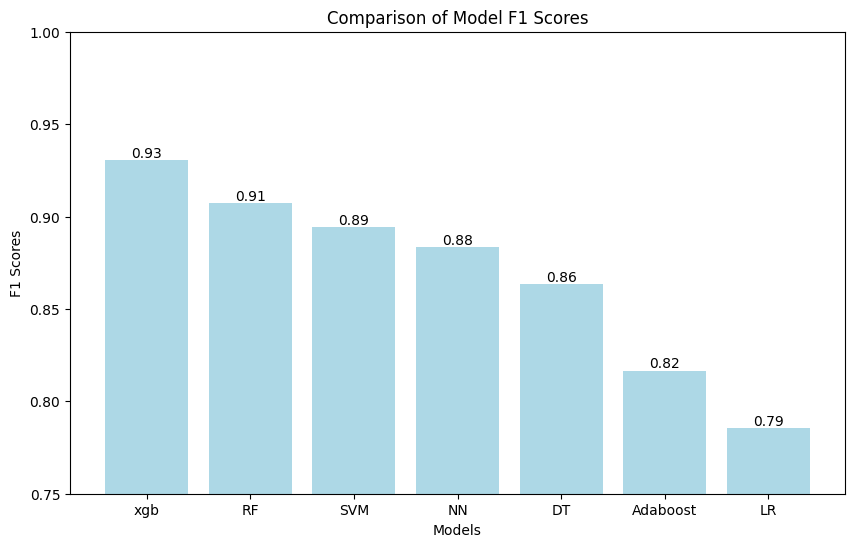

In [48]:
# Splitting into separate dictionaries for F1 scores and accuracies
f1_scores = {model: scores[0] for model, scores in models.items()}
accuracy_scores = {model: scores[1] for model, scores in models.items()}

# Sorting the dictionaries by scores
sorted_f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Plotting F1 scores
plt.figure(figsize=(10, 6))
plt.bar(sorted_f1_scores.keys(), sorted_f1_scores.values(), color='lightblue')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Comparison of Model F1 Scores')
plt.ylim([0.75, 1.0])
for i, score in enumerate(sorted_f1_scores.values()):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.show()



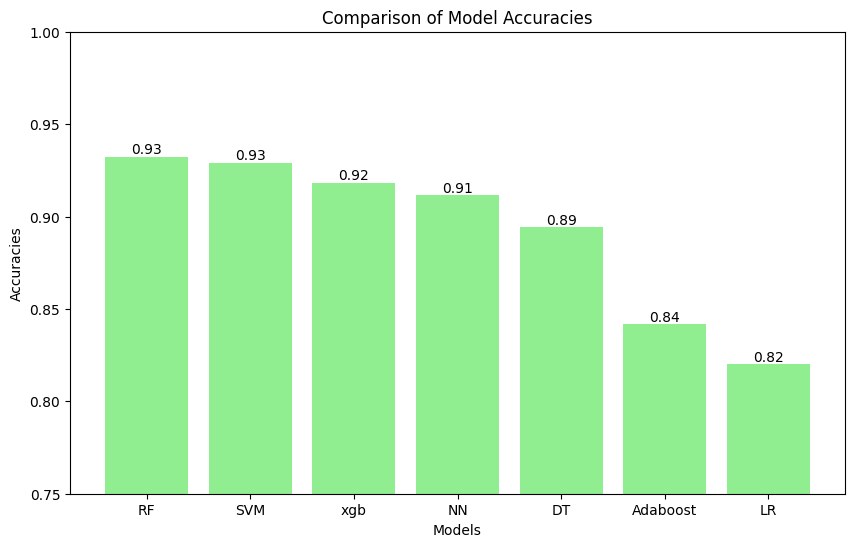

In [49]:
# Plotting Accuracies
plt.figure(figsize=(10, 6))
plt.bar(sorted_accuracy_scores.keys(), sorted_accuracy_scores.values(), color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.75, 1.0])
for i, score in enumerate(sorted_accuracy_scores.values()):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.show()